# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [2]:
linreg = LinearRegression()

Create a baseline model which includes all the variables we selected from the Ames housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [18]:
ames = pd.read_csv('ames.csv',index_col=None,encoding='latin1')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

## code here
ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - np.mean(feature)) / np.std(feature)

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

#preprocessed = pd.concat([ames_cont, ames_ohe], axis=1)
preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

#X = preprocessed.drop('SalePrice', axis=1)
#y = preprocessed['SalePrice']
X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']
print('X:',np.size(X))
print('y:',np.size(y))

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))

baseline

X: 68620
y: 1460


0.8174636844561982

In [4]:
X_baseline = sm.add_constant(X)
model = sm.OLS(y,X_baseline)
results = model.fit()

results.summary()

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:38:37   Log-Likelihood:                -738.64
No. Observations:                1460   AIC:                             1573.
Df Residuals:                    1412   BIC:                             1827.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1317      0.263     -0.500      0.617      -0.648       0.385
LotArea_log              0.1033      0.019      5.475      0.000       0.066       0.140
1stFlrSF_log             0.1371      0.016      8.584      0.000       0.106       0.168
GrLivArea_log            0.3768      0.016     24.114      0.000       0.346       0.407
BldgType_2fmCon         -0.1715      0.079     -2.173      0.030      -0.326      -0.017
BldgType_Duplex         -0.4205      0.062     -6.813      0.000      -0.542      -0.299
BldgType_Twnhs          -0.1404      0.093     -1.513      0.130      -0.322       0.042
BldgType_TwnhsE         -0.0512      0.060     -0.858      0.391      -0.168       0.066
KitchenQual_Fa          -1.0002      0.088    -11.315      0.000      -1.174      -0.827
KitchenQual_Gd          -0.3822      0.050     -7.613      0.000      -0.481      -0.284
KitchenQual_TA          -0.6695      0.055    -12.111      0.000      -0.778      -0.561
SaleType_CWD             0.2286      0.215      1.061      0.289      -0.194       0.651
SaleType_Con             0.5863      0.304      1.927      0.054      -0.010       1.183
SaleType_ConLD           0.3152      0.155      2.029      0.043       0.010       0.620
SaleType_ConLI           0.0331      0.195      0.169      0.865      -0.350       0.416
SaleType_ConLw           0.0161      0.196      0.082      0.935      -0.368       0.400
SaleType_New             0.3000      0.079      3.803      0.000       0.145       0.455
SaleType_Oth             0.1179      0.246      0.480      0.631      -0.364       0.599
SaleType_WD              0.1749      0.065      2.676      0.008       0.047       0.303
MSZoning_FV              1.0670      0.193      5.526      0.000       0.688       1.446
MSZoning_RH              0.8771      0.194      4.512      0.000       0.496       1.258
MSZoning_RL              0.9964      0.162      6.151      0.000       0.679       1.314
MSZoning_RM              1.1027      0.152      7.264      0.000       0.805       1.400
Street_Pave             -0.2132      0.180     -1.182      0.237      -0.567       0.141
Neighborhood_Blueste     0.0530      0.318      0.167      0.868      -0.571       0.677
Neighborhood_BrDale     -0.4629      0.171     -2.711      0.007      -0.798      -0.128
Neighborhood_BrkSide    -0.6500      0.137     -4.735      0.000      -0.919      -0.381
Neighborhood_ClearCr    -0.2103      0.144     -1.456      0.146      -0.494       0.073
Neighborhood_CollgCr    -0.0761      0.119     -0.641      0.522      -0.309       0.157
Neighborhood_Crawfor    -0.0824      0.129     -0.638      0.523      -0.336       0.171
Neighborhood_Edwards    -0.7615      0.124     -6.143      0.000      -1.005      -0.518
Neighborhood_Gilbert    -0.0980      0.126     -0.777    

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

Since there are so many different neighbourhoods we will exclude

In [5]:
from itertools import combinations

In [6]:
# code to find top interactions by R^2 value here
interactions = []

feat_combinations = combinations(X.columns, 2)
data = X.copy()

for i, (a,b) in enumerate(feat_combinations):
    if i%50 == 0:
        print(i,(a,b))
    data['interaction'] = data[a] * data[b]
    result = np.mean(cross_val_score(linreg, data, y, scoring='r2', cv=crossvalidation))
    if result > baseline:
        interactions.append((a, b, round(result,3)))
        
sort_interactions = sorted(interactions, key=lambda x:x[2], reverse=True)[:3]
print('Top 3 interactions:',sort_interactions)

0 ('LotArea_log', '1stFlrSF_log')
50 ('1stFlrSF_log', 'BldgType_TwnhsE')
100 ('GrLivArea_log', 'SaleType_ConLD')
150 ('BldgType_2fmCon', 'MSZoning_RH')
200 ('BldgType_Duplex', 'Neighborhood_CollgCr')
250 ('BldgType_Twnhs', 'Neighborhood_NWAmes')
300 ('BldgType_TwnhsE', 'Neighborhood_Veenker')
350 ('KitchenQual_Gd', 'MSZoning_RH')
400 ('KitchenQual_TA', 'Neighborhood_MeadowV')
450 ('SaleType_CWD', 'Neighborhood_Veenker')
500 ('SaleType_ConLD', 'Neighborhood_CollgCr')
550 ('SaleType_ConLI', 'Neighborhood_StoneBr')
600 ('SaleType_New', 'Neighborhood_IDOTRR')
650 ('SaleType_WD', 'Street_Pave')
700 ('MSZoning_FV', 'Neighborhood_StoneBr')
750 ('MSZoning_RL', 'Neighborhood_Sawyer')
800 ('Street_Pave', 'Neighborhood_SawyerW')
850 ('Neighborhood_BrkSide', 'Neighborhood_ClearCr')
900 ('Neighborhood_CollgCr', 'Neighborhood_NoRidge')
950 ('Neighborhood_Gilbert', 'Neighborhood_NWAmes')
1000 ('Neighborhood_Mitchel', 'Neighborhood_StoneBr')
1050 ('Neighborhood_NridgHt', 'Neighborhood_StoneBr')
Top 3 

It looks like the top interactions involve the Neighborhood_Edwards feature so lets add the interaction between LotArea and Edwards to our model.

We can interpret this feature as the relationship between LotArea and SalePrice when the house is in Edwards or not.

## Visualize the Interaction

Separate all houses that are located in Edwards and those that are not. Run a linear regression on each population against `SalePrice`. Visualize the regression line and data points with price on the y axis and LotArea on the x axis.

In [7]:
preprocessed.columns

Index(['LotArea_log', '1stFlrSF_log', 'GrLivArea_log', 'SalePrice_log',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Nei

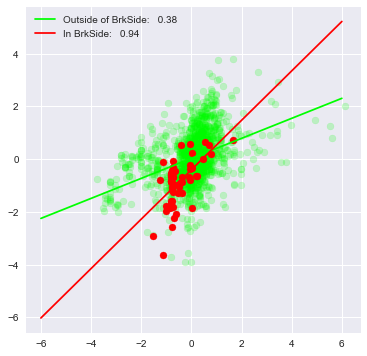

In [8]:
# Visualization code here
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

interaction_df = preprocessed.loc[preprocessed.Neighborhood_BrkSide == 1,['LotArea_log','SalePrice_log']]
noninteraction_df = preprocessed.loc[preprocessed.Neighborhood_BrkSide == 0,['LotArea_log','SalePrice_log']]

# with interaction
linreg_nonint = LinearRegression()
linreg_nonint.fit(noninteraction_df[['LotArea_log']], noninteraction_df['SalePrice_log'])
preds_nonint = linreg_nonint.predict(noninteraction_df[['LotArea_log']])
ax.scatter(noninteraction_df[['LotArea_log']], noninteraction_df['SalePrice_log'], alpha=.2, color='lime', label=None)
x = np.linspace(-6, 6)
ax.plot(x, linreg_nonint.predict(x.reshape(-1,1)), color='lime', label=f'Outside of BrkSide:   {linreg_nonint.coef_[0]:.2f}')

# without interaction
linreg_int = LinearRegression()
linreg_int.fit(interaction_df[['LotArea_log']], interaction_df['SalePrice_log'])
preds_int = linreg_int.predict(interaction_df[['LotArea_log']])
ax.scatter(interaction_df[['LotArea_log']], interaction_df['SalePrice_log'], alpha=1, color='red', label=None)
x = np.linspace(-6, 6)
ax.plot(x, linreg_int.predict(x.reshape(-1,1)), color='red', label=f'In BrkSide:   {linreg_int.coef_[0]:.2f}')

ax.legend()

0 Neighborhood_BrkSide
outside: [0.379542]
inside: [0.93709332]
1 Neighborhood_Mitchel
outside: [0.41456803]
inside: [-0.03683699]
2 BldgType_Duplex
outside: [0.74689787]
inside: [0.27950244]


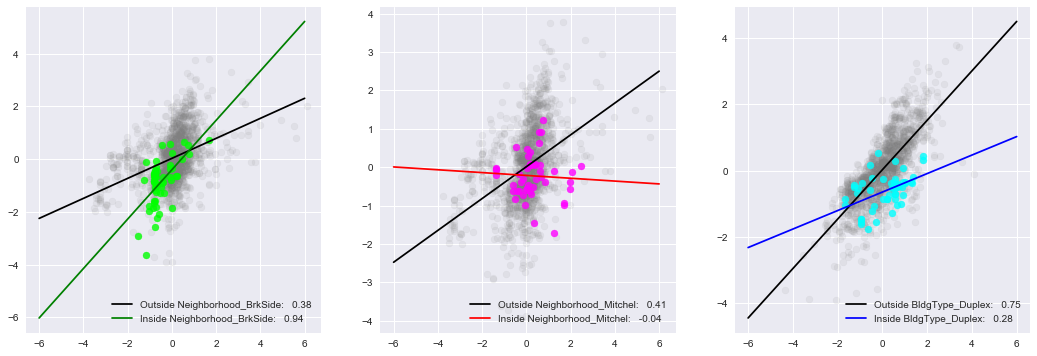

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

interaction_lst = ['Neighborhood_BrkSide','Neighborhood_Mitchel','BldgType_Duplex']
X1_log = 'LotArea_log'
X2_log = 'GrLivArea_log'
y_log = 'SalePrice_log'
cols_1 = [X1_log,y_log] 
cols_2 = [X2_log,y_log]
xcord = [-6, -6, -6]
ycord = [6, 6, 6]
c1 = ['lime', 'magenta', 'cyan']
c2 = ['green', 'red', 'blue']

for idx, xcol in enumerate(interaction_lst):
    print(idx, xcol)
     
    # non-interaction    
    linreg_nonint = LinearRegression()
    if idx < 2:
        noninteraction = preprocessed.loc[preprocessed[xcol] == 0, cols_1]
        linreg_nonint.fit(noninteraction[[X1_log]], noninteraction[y_log])
        preds_nonint = linreg_nonint.predict(noninteraction[[X1_log]])
        axes[idx].scatter(noninteraction[[X1_log]], noninteraction[y_log], alpha=.1, color='gray', label=None)
    else:
        noninteraction = preprocessed.loc[preprocessed[xcol] == 0, cols_2]
        linreg_nonint.fit(noninteraction[[X2_log]], noninteraction[y_log])
        preds_nonint = linreg_nonint.predict(noninteraction[[X2_log]])
        axes[idx].scatter(noninteraction[[X2_log]], noninteraction[y_log], alpha=.1, color='gray', label=None)
    
    #print(list(preds_nonint))
    x_nonint = np.linspace(xcord[idx], ycord[idx])
    axes[idx].plot(x_nonint, linreg_nonint.predict(x_nonint.reshape(-1,1)), color='black', label=f'Outside {interaction_lst[idx]}:   {linreg_nonint.coef_[0]:.2f}')
    print('outside:',linreg_nonint.coef_)
    
    # interaction
    linreg_int = LinearRegression()
    if idx < 2:
        interaction = preprocessed.loc[preprocessed[xcol] == 1, cols_1]
        linreg_int.fit(interaction[[X1_log]], interaction[y_log])
        preds_int = linreg_int.predict(interaction[[X1_log]])
        axes[idx].scatter(interaction[[X1_log]], interaction[y_log], alpha=.8, color=c1[idx], label=None)
    else:
        interaction = preprocessed.loc[preprocessed[xcol] == 1, cols_2]
        linreg_int.fit(interaction[[X2_log]], interaction[y_log])
        preds_int = linreg_int.predict(interaction[[X2_log]])
        axes[idx].scatter(interaction[[X2_log]], interaction[y_log], alpha=.8, color=c1[idx], label=None)
   
    #print(list(preds_int))
    x_int = np.linspace(xcord[idx], ycord[idx])
    axes[idx].plot(x_int, linreg_int.predict(x_int.reshape(-1,1)), color=c2[idx], label=f'Inside {interaction_lst[idx]}:   {linreg_int.coef_[0]:.2f}')
    print('inside:',linreg_int.coef_)
    
    axes[idx].legend(loc=4)

## Build a final model with interactions

Use 10-fold cross-validation to build a model using the above interaction. 

In [10]:
# code here
regression_1 = LinearRegression()
crossvalidation_1 = KFold(n_splits=10, shuffle=True, random_state=1)

X1_interact = X.copy()
X1_interact['LotArea_Neighborhood_BrkSide'] = X['LotArea_log'] * X['Neighborhood_BrkSide']

interact1_model = np.mean(cross_val_score(regression_1, X1_interact, y, scoring='r2', cv=crossvalidation_1))
interact1_model

0.8195228553736742

In [11]:
regression_2 = LinearRegression()
crossvalidation_2 = KFold(n_splits=10, shuffle=True, random_state=1)

X2_interact = X.copy()
X2_interact['LotArea_Neighborhood_Mitchel'] = X['LotArea_log'] * X['Neighborhood_Mitchel']

interact2_model = np.mean(cross_val_score(regression_2, X2_interact, y, scoring='r2', cv=crossvalidation_2))
interact2_model

0.8196447680686683

In [12]:
regression_3 = LinearRegression()
crossvalidation_3 = KFold(n_splits=10, shuffle=True, random_state=1)

X3_interact = X.copy()
X3_interact['GrLivArea_BldgType_Duplex'] = X['GrLivArea_log'] * X['BldgType_Duplex']

interact3_model = np.mean(cross_val_score(regression_3, X3_interact, y, scoring='r2', cv=crossvalidation_3))
interact3_model

0.819620127969196

Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if this interactions are significant.

In [14]:
# code here
X1_interact = sm.add_constant(X1_interact)
model1 = sm.OLS(y,X1_interact)
results1 = model1.fit()

results1.summary()

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     155.4
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:47:29   Log-Likelihood:                -729.47
No. Observations:                1460   AIC:                             1557.
Df Residuals:                    1411   BIC:                             1816.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0468      0.263     -0.178      0.858      -0.562       0.468
LotArea_log                      0.0932      0.019      4.928      0.000       0.056       0.130
1stFlrSF_log                     0.1374      0.016      8.650      0.000       0.106       0.169
GrLivArea_log                    0.3733      0.016     23.999      0.000       0.343       0.404
BldgType_2fmCon                 -0.1766      0.078     -2.251      0.025      -0.331      -0.023
BldgType_Duplex                 -0.4245      0.061     -6.919      0.000      -0.545      -0.304
BldgType_Twnhs                  -0.1801      0.093     -1.942      0.052      -0.362       0.002
BldgType_TwnhsE                 -0.0859      0.060     -1.434      0.152      -0.203       0.032
KitchenQual_Fa                  -0.9804      0.088    -11.142      0.000      -1.153      -0.808
KitchenQual_Gd                  -0.3898      0.050     -7.806      0.000      -0.488      -0.292
KitchenQual_TA                  -0.6690      0.055    -12.175      0.000      -0.777      -0.561
SaleType_CWD                     0.2349      0.214      1.097      0.273      -0.185       0.655
SaleType_Con                     0.5950      0.302      1.967      0.049       0.002       1.188
SaleType_ConLD                   0.3167      0.154      2.051      0.040       0.014       0.620
SaleType_ConLI                   0.0224      0.194      0.115      0.908      -0.359       0.403
SaleType_ConLw                   0.0311      0.195      0.160      0.873      -0.351       0.413
SaleType_New                     0.2977      0.078      3.796      0.000       0.144       0.452
SaleType_Oth                     0.1145      0.244      0.469      0.639      -0.364       0.593
SaleType_WD                      0.1728      0.065      2.660      0.008       0.045       0.300
MSZoning_FV                      1.0163      0.192      5.284      0.000       0.639       1.394
MSZoning_RH                      0.8182      0.194      4.223      0.000       0.438       1.198
MSZoning_RL                      0.9429      0.162      5.837      0.000       0.626       1.260
MSZoning_RM                      1.1056      0.151      7.327      0.000       0.810       1.402
Street_Pave                     -0.2254      0.179     -1.257      0.209      -0.577       0.126
Neighborhood_Blueste            -0.0187      0.317     -0.059      0.953      -0.640       0.602
Neighborhood_BrDale             -0.5317      0.171     -3.118      0.002      -0.866      -0.197
Neighborhood_BrkSide            -0.4956      0.141     -3.508      0.000      -0.773      -0.218
Neighborhood_ClearCr            -0.2069      0.144     -1.441      0.150      -0.489       0.075
Neighborhood_CollgCr            -0.0885      0.118     -0.750      0.453    

In [15]:
X2_interact = sm.add_constant(X2_interact)
model2 = sm.OLS(y,X2_interact)
results2 = model2.fit()

results2.summary()

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     155.1
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:47:36   Log-Likelihood:                -730.72
No. Observations:                1460   AIC:                             1559.
Df Residuals:                    1411   BIC:                             1818.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.1571      0.262     -0.600      0.549      -0.671       0.357
LotArea_log                      0.1159      0.019      6.088      0.000       0.079       0.153
1stFlrSF_log                     0.1361      0.016      8.559      0.000       0.105       0.167
GrLivArea_log                    0.3759      0.016     24.173      0.000       0.345       0.406
BldgType_2fmCon                 -0.1569      0.079     -1.996      0.046      -0.311      -0.003
BldgType_Duplex                 -0.4114      0.061     -6.695      0.000      -0.532      -0.291
BldgType_Twnhs                  -0.1365      0.092     -1.478      0.140      -0.318       0.045
BldgType_TwnhsE                 -0.0516      0.059     -0.869      0.385      -0.168       0.065
KitchenQual_Fa                  -0.9999      0.088    -11.370      0.000      -1.172      -0.827
KitchenQual_Gd                  -0.3771      0.050     -7.548      0.000      -0.475      -0.279
KitchenQual_TA                  -0.6663      0.055    -12.114      0.000      -0.774      -0.558
SaleType_CWD                     0.2299      0.214      1.073      0.283      -0.190       0.650
SaleType_Con                     0.5830      0.303      1.926      0.054      -0.011       1.177
SaleType_ConLD                   0.3131      0.155      2.025      0.043       0.010       0.616
SaleType_ConLI                   0.0348      0.194      0.179      0.858      -0.347       0.416
SaleType_ConLw                   0.0197      0.195      0.101      0.920      -0.363       0.402
SaleType_New                     0.2958      0.078      3.769      0.000       0.142       0.450
SaleType_Oth                     0.1205      0.244      0.493      0.622      -0.359       0.600
SaleType_WD                      0.1752      0.065      2.695      0.007       0.048       0.303
MSZoning_FV                      1.1031      0.192      5.735      0.000       0.726       1.480
MSZoning_RH                      0.9048      0.194      4.675      0.000       0.525       1.285
MSZoning_RL                      1.0202      0.161      6.325      0.000       0.704       1.337
MSZoning_RM                      1.1029      0.151      7.303      0.000       0.807       1.399
Street_Pave                     -0.1887      0.180     -1.051      0.294      -0.541       0.164
Neighborhood_Blueste             0.0891      0.317      0.281      0.778      -0.532       0.710
Neighborhood_BrDale             -0.4318      0.170     -2.539      0.011      -0.765      -0.098
Neighborhood_BrkSide            -0.6597      0.137     -4.829      0.000      -0.928      -0.392
Neighborhood_ClearCr            -0.2558      0.144     -1.775      0.076      -0.539       0.027
Neighborhood_CollgCr            -0.1024      0.118     -0.865      0.387    

In [16]:
X3_interact = sm.add_constant(X3_interact)
model3 = sm.OLS(y,X3_interact)
results3 = model3.fit()

results3.summary()

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     155.2
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:47:42   Log-Likelihood:                -730.24
No. Observations:                1460   AIC:                             1558.
Df Residuals:                    1411   BIC:                             1817.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2589      0.264     -0.982      0.326      -0.776       0.259
LotArea_log                   0.1037      0.019      5.528      0.000       0.067       0.141
1stFlrSF_log                  0.1362      0.016      8.569      0.000       0.105       0.167
GrLivArea_log                 0.3879      0.016     24.579      0.000       0.357       0.419
BldgType_2fmCon              -0.1709      0.079     -2.177      0.030      -0.325      -0.017
BldgType_Duplex              -0.3839      0.062     -6.187      0.000      -0.506      -0.262
BldgType_Twnhs               -0.1360      0.092     -1.473      0.141      -0.317       0.045
BldgType_TwnhsE              -0.0471      0.059     -0.793      0.428      -0.164       0.069
KitchenQual_Fa               -0.9891      0.088    -11.245      0.000      -1.162      -0.817
KitchenQual_Gd               -0.3775      0.050     -7.559      0.000      -0.475      -0.280
KitchenQual_TA               -0.6585      0.055    -11.962      0.000      -0.766      -0.550
SaleType_CWD                  0.2143      0.214      1.000      0.317      -0.206       0.634
SaleType_Con                  0.5745      0.303      1.898      0.058      -0.019       1.168
SaleType_ConLD                0.3206      0.155      2.074      0.038       0.017       0.624
SaleType_ConLI                0.0449      0.194      0.231      0.817      -0.336       0.426
SaleType_ConLw                0.0096      0.195      0.049      0.961      -0.372       0.392
SaleType_New                  0.2897      0.078      3.691      0.000       0.136       0.444
SaleType_Oth                  0.1030      0.244      0.422      0.673      -0.376       0.582
SaleType_WD                   0.1654      0.065      2.544      0.011       0.038       0.293
MSZoning_FV                   1.0191      0.192      5.297      0.000       0.642       1.397
MSZoning_RH                   0.8773      0.193      4.537      0.000       0.498       1.257
MSZoning_RL                   0.9497      0.162      5.879      0.000       0.633       1.267
MSZoning_RM                   1.0628      0.151      7.025      0.000       0.766       1.360
Street_Pave                  -0.0363      0.185     -0.197      0.844      -0.399       0.326
Neighborhood_Blueste          0.0336      0.316      0.106      0.915      -0.587       0.654
Neighborhood_BrDale          -0.4721      0.170     -2.780      0.006      -0.805      -0.139
Neighborhood_BrkSide         -0.6499      0.137     -4.760      0.000      -0.918      -0.382
Neighborhood_ClearCr         -0.2184      0.144     -1.520      0.129      -0.500       0.063
Neighborhood_CollgCr         -0.0755      0.118     -0.640      0.523      -0.307       0.156
Neighborhood_Crawfor         -0.0828      0.128     -0.645      0.519      

What is your conclusion here?

In [ ]:
# formulate your conclusion

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.